In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Preprocessing images
dir_list= os.listdir('./img')
images=list()
for i in dir_list:
    images.append(cv2.imread('./img/'+i))
    
for i in images:
    images[images.index(i)] = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

for i in images:
    images[images.index(i)] = cv2.resize(i,(100,100))
    
for i in images:
    images[images.index(i)] = i.reshape((i.shape[0] * i.shape[1], 1))
        

In [3]:
#Spliting data
images_train, images_test= train_test_split(images, test_size=0.2)

In [4]:
#Set the number of clusters
num_clusters = 5
labeled_images=list()
labels_=list()
cluster_centers_=list()
km = KMeans(n_clusters=num_clusters)

# Run k-means clustering
for i in images_train:    
    km.fit(i)
    cluster_centers = km.cluster_centers_.squeeze()
    labels = km.labels_
    
    # Convert the labels back into a 2D image
    labels = labels.reshape(i.shape[0], i.shape[1])

    # Create an image for each cluster
    segmented_image = np.zeros_like(i)
    for i in range(num_clusters):
        segmented_image[labels == i] = cluster_centers[i]
        
    labeled_images.append(segmented_image)
    labels_.append(labels)
    

In [5]:
# Use the segmented image as input to a machine learning model
model = SVC()
for i in range(len(labeled_images)):
    model.fit(labeled_images[i], labels_[i])

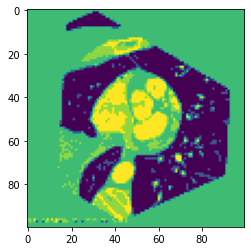

In [6]:
for i in images_test:
    predictions= model.predict(i)    
    predictedImage = np.zeros_like(i)

for i in range(num_clusters):
    predictedImage[predictions == i] = cluster_centers[i]

predictedImage = predictedImage.reshape(100,100)*255.0
plt.imshow(predictedImage)
plt.show()